In [6]:
import pandas as pd
import os
from src.functions import replicate_seasonal_pattern

In [3]:
dfs = []

train_path = '../data/labeled'

files = os.listdir(train_path)
combined_df = pd.DataFrame({})
for i, f in enumerate(files):
    df = pd.read_csv(os.path.join(train_path, f))
    df['station_code'] = f[:-4]
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df = combined_df[['station_code', 'measure_date', 'HS', 'TSS_30MIN_MEAN', 'RSWR_30MIN_MEAN', 'TA_30MIN_MEAN', 'VW_30MIN_MEAN']]

In [4]:
missing_values_matrix = combined_df.groupby('station_code').apply(lambda df: df.isna().sum())
missing_values_matrix = missing_values_matrix[['TSS_30MIN_MEAN', 'RSWR_30MIN_MEAN', 'TA_30MIN_MEAN', 'VW_30MIN_MEAN']]
missing_values_matrix = missing_values_matrix[~(missing_values_matrix < 10).all(axis=1)]
missing_values_matrix.head(n=20)

,TSS_30MIN_MEAN,RSWR_30MIN_MEAN,TA_30MIN_MEAN,VW_30MIN_MEAN
station_code,,,,
AMD2,0,0,0,64
ARO3,37027,37027,0,37027
FNH2,1024,0,0,0
KLO2,0,0,0,39062
LAG3,173040,173040,0,0
RNZ2,16659,16659,0,0
TRU2,0,4,0,51202
TUM2,38356,38356,38356,38356
WFJ2,119927,119927,119927,119927


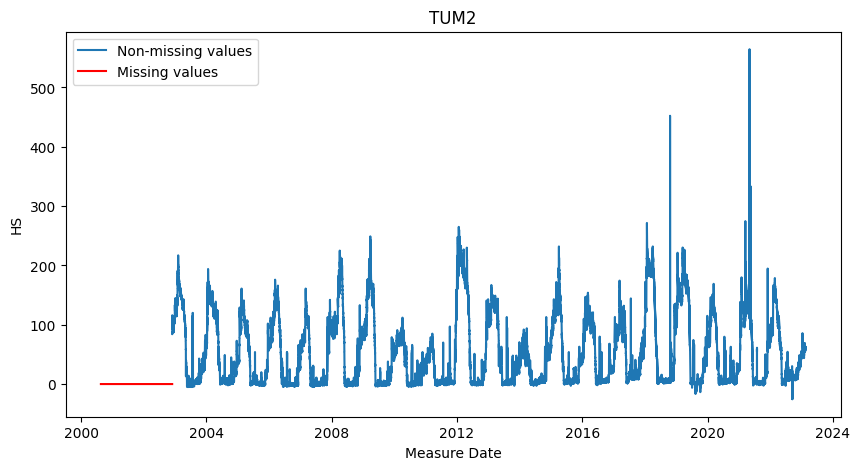

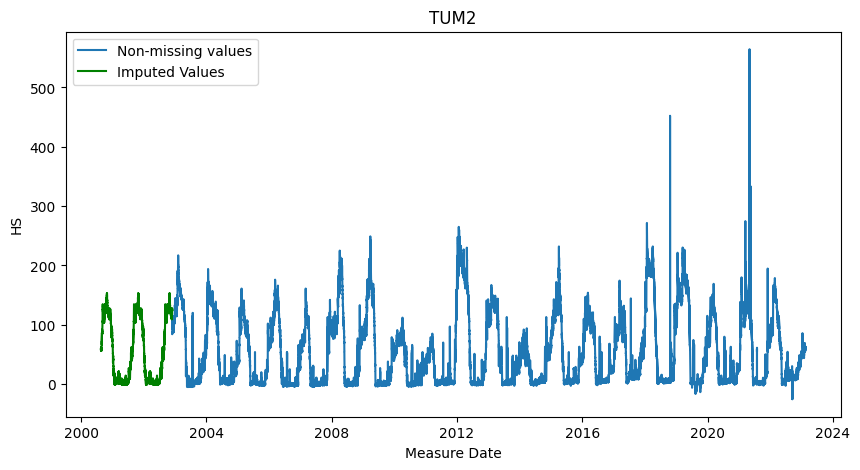

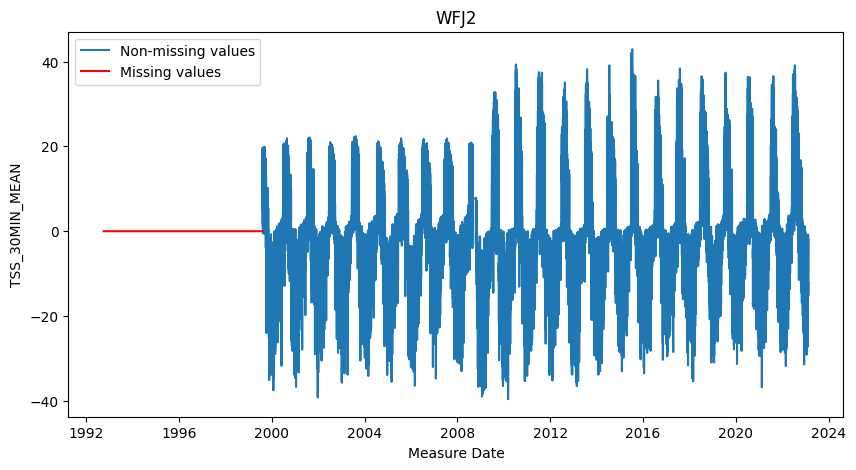

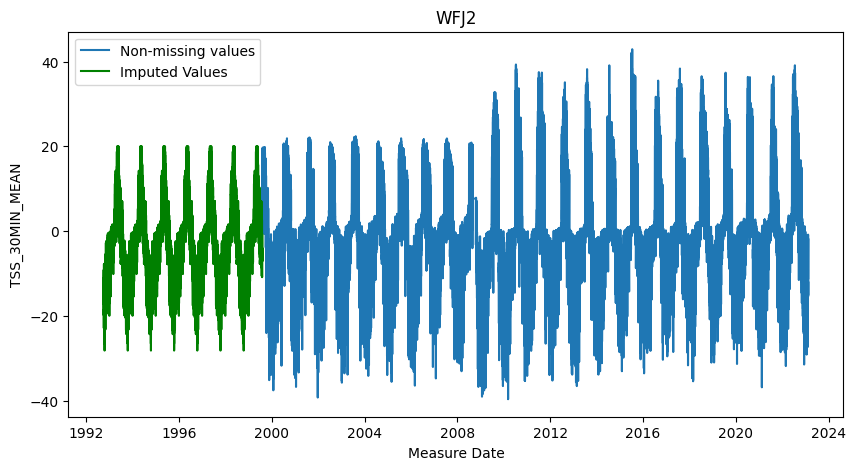

In [8]:
def display_missing_values(station_code, col, show_imputations=False):
    station = combined_df[combined_df['station_code'] == station_code][['measure_date', col]].copy()
    station.set_index(pd.to_datetime(station['measure_date']), inplace=True)

    plt.figure(figsize=(10, 5))
    plt.plot(station[col], label='Non-missing values')

    missing_values = station[station[col].isna()]
    plt.plot(station[:missing_values.index[-1]].index, [0] * len(missing_values), color='red', label='Missing values')

    plt.xlabel('Measure Date')
    plt.ylabel(col)
    plt.legend()
    plt.title(station_code)
    plt.show()
    
    if show_imputations:
        plt.figure(figsize=(10, 5))
        plt.plot(station[col], label='Non-missing values')

        station['replicated'] = replicate_seasonal_pattern(station, col)[col]
        plt.plot(station[:missing_values.index[-1]]['replicated'], color='orange', label='Imputed Values')

        plt.xlabel('Measure Date')
        plt.ylabel(col)
        plt.legend()
        plt.title(station_code)
        plt.show()
        
display_missing_values('TUM2', 'HS', True)
display_missing_values('WFJ2', 'TSS_30MIN_MEAN', True)

In [ ]:
import matplotlib.pyplot as plt
for col in missing_values_matrix.columns.values:
    indexes = missing_values_matrix[missing_values_matrix[col] > 0].index.values

    for station_code in indexes:
        display_missing_values(station_code, col)